In [42]:
import pandas as pd

df = pd.read_csv("../../data/raw/census_income_dataset_original.csv")
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [44]:
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
Income              0
dtype: int64


In [45]:
# Summary statistics for numeric features
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


We iterate through all categorical columns to count the number of unique categories. This helps us understand the diversity and cardinality of each feature.


In [46]:
# Count of unique values in each categorical variable
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

workclass: 9 unique values
education: 16 unique values
marital-status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native-country: 42 unique values
Income: 4 unique values


### Encoding target variable

The `Income` column contains trailing periods (e.g., `<=50K.`). We remove these characters to clean the data for encoding.

In [47]:
unique_income_values = df['Income'].unique()
print(unique_income_values)

['<=50K' '>50K' '<=50K.' '>50K.']


In [48]:
# Using str.replace to remove the dot at the end of the strings in the 'Income' column
df['Income'] = df['Income'].str.replace(r'\.$', '', regex=True)

# Checking the updated unique values to confirm the change
print(df['Income'].unique())

['<=50K' '>50K']


In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Income'] = encoder.fit_transform(df['Income']) #<=50K will be encoded as 0 and >50K will be encoded as 1

### Exploratory Data Analysis (EDA)

##### 1. Correlation matrix

In [50]:
correlation_matrix = df.corr()
correlation_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
Income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


Observation:
1. The correlation matrix shows that education-num has the highest positive correlation with Income (0.33), reinforcing that education level is a strong indicator of higher earnings.

2. Features like capital-gain (0.22) and hours-per-week (0.23) also show meaningful positive relationships with income.

3. age is positively correlated with income (0.23), likely due to experience and career progression.

4. In contrast, fnlwgt (final weight) shows negligible negative correlation with income (-0.006), indicating it's likely not predictive and could be dropped.

5. The remaining features (capital-loss, education-num, etc.) have weak to moderate correlations and may support the model depending on context.

##### 2. Heatmap

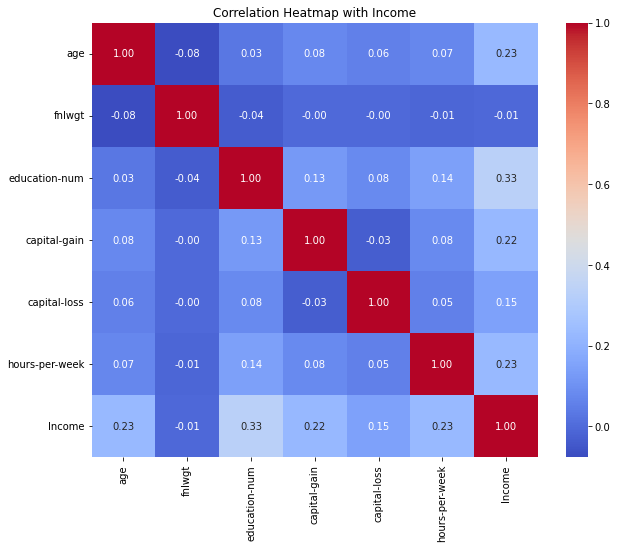

In [51]:
#Plotting the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap with Income')
plt.show()

Observation:
1. The feature education-num has the highest positive correlation with Income (0.33), indicating that individuals with more years of education are more likely to earn over 50K.

2. hours-per-week and capital-gain also show moderate positive correlations (around 0.22–0.23), suggesting that working more hours or having capital gains contributes positively to higher income.

3. age is mildly correlated with income (0.23), possibly reflecting career progression with age.

4. On the other hand, fnlwgt, a weighting factor used in the original survey sampling, shows almost no correlation with income and may not be a predictive feature.

5. capital-loss has a weak positive correlation, but significantly less than capital-gain, indicating it's a less important signal.

##### 3. Distribution of numerical features in dataset

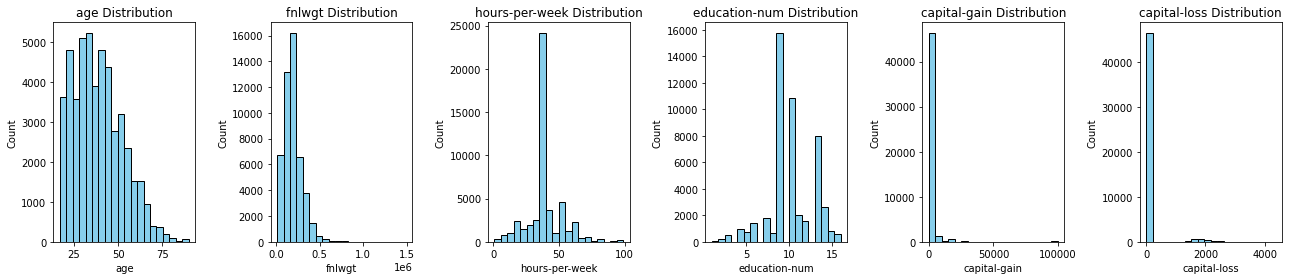

In [52]:
import matplotlib.pyplot as plt

numerical_cols = ['age', 'fnlwgt', 'hours-per-week', 'education-num', 'capital-gain', 'capital-loss']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(3 * len(numerical_cols), 4))

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Observations:
1. Most features like age, hours-per-week, and fnlwgt are right-skewed, with a majority of values concentrated toward the lower end.

2. capital-gain and capital-loss have a heavy concentration at zero, indicating that most individuals did not report capital income or loss.

3. education-num shows a discrete distribution, reflecting the categorical nature of education levels represented numerically.

##### 4. Distribution of categorical features vs Income

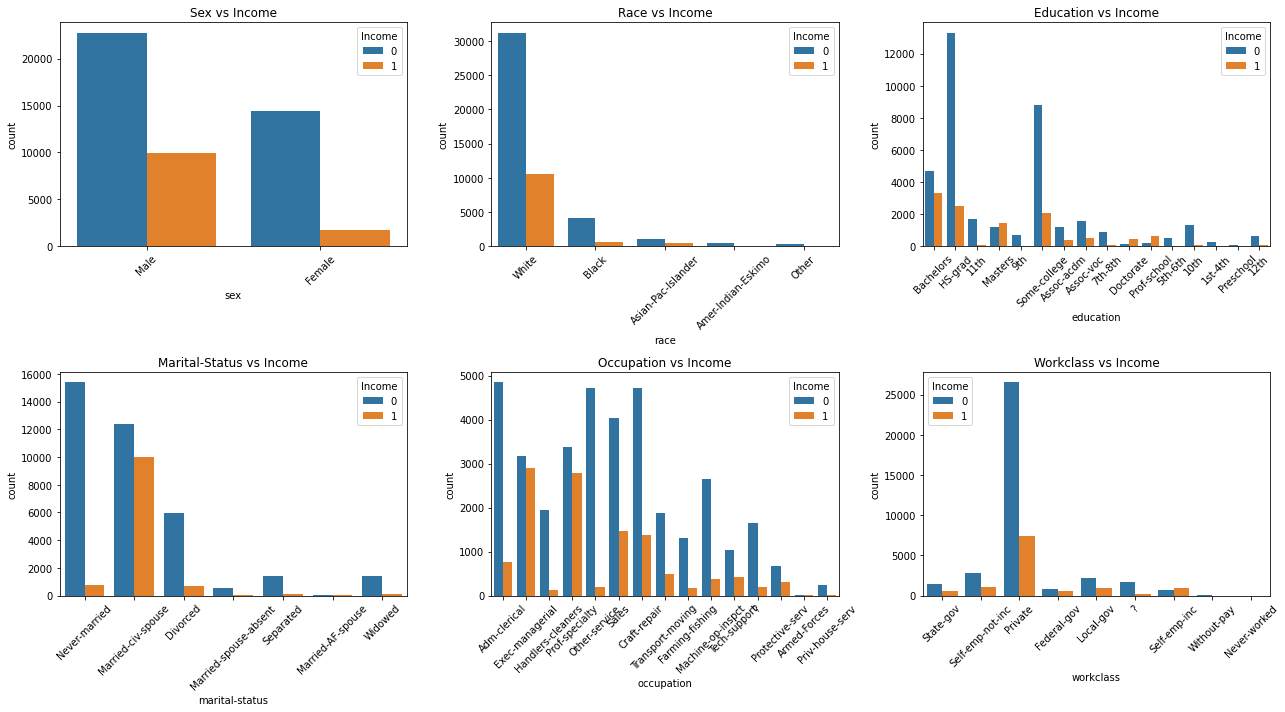

In [53]:
import seaborn as sns

categorical_cols = ['sex', 'race', 'education', 'marital-status', 'occupation', 'workclass']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, col in enumerate(categorical_cols):
    ax = axes[i // 3, i % 3]
    sns.countplot(x=col, hue='Income', data=df, ax=ax)
    ax.set_title(f'{col.title()} vs Income')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Observations:
1. Higher income (Income = 1) is more common among males, individuals with higher education, and those in professional/managerial occupations.

2. Categories like private workclass and never-married marital status are mostly associated with lower income (Income = 0).

3. Disparities in income are clearly visible across gender, education, and workclass.

### Preprocessing Numerical Features

##### Dropping columns

Based on the low correlation between fnlwgt (final weight) and Income, it appears that this feature may not be very useful for predicting income. Hence dropping fnlgwt column.

In [54]:
df.drop('fnlwgt', axis=1, inplace=True)

Dropping education-num because it's a numeric duplicate of education. Keeping both adds redundancy, so I'm preprocessing only education for simplicity and clarity.

In [55]:
df.drop('education-num', axis=1, inplace=True)

Based on the highly skewed and sparse distribution of both capital-gain and capital-loss — where the majority of entries are 0 and only a few have extreme values — these features may not contribute significantly to most models. As they only add noise to the dataset dropping them is a better choice.

In [56]:
df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [57]:
# Dropping duplicate rows after initial cleaning
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Dropped {before - after} duplicate rows.")

Dropped 7655 duplicate rows.


##### Visualizing and identifying outliers

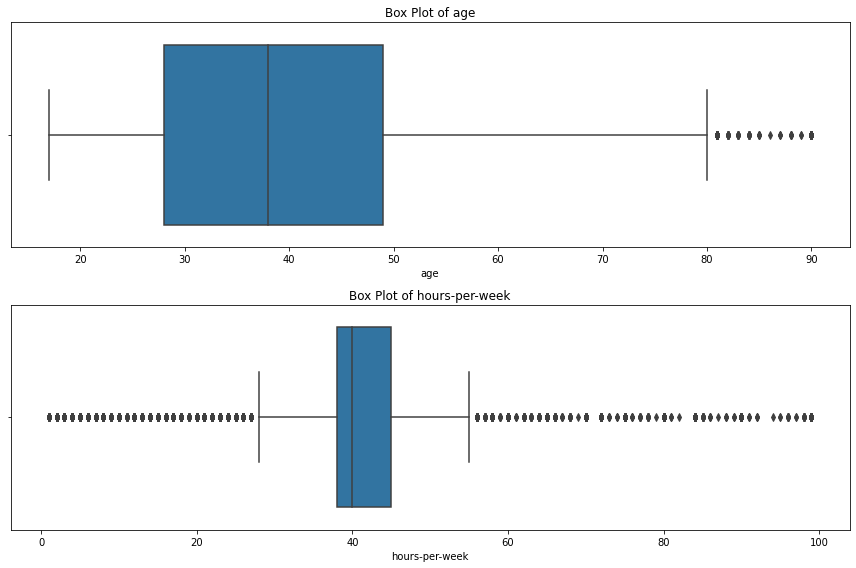

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['age', 'hours-per-week']


plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Based on the distribution of the hours-per-week column, a small number of entries exceed typical full-time or overtime work hours (e.g., 70–99 hours/week). These values are potential outliers that may distort model performance. Since values above 55 hours are rare and likely not representative of the general population. Hence capping the hours-per-week feature at 55 to reduce the influence of extreme outliers while retaining all data points.

In [59]:
upper_limit_hours = 55
df['hours-per-week'] = df['hours-per-week'].clip(upper=upper_limit_hours)

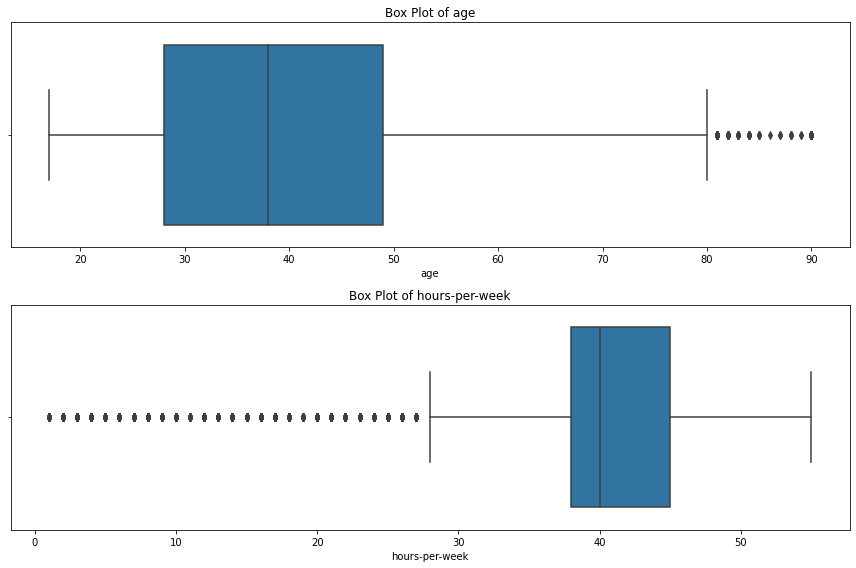

In [60]:
plt.figure(figsize=(12, 8))
numerical_columns = ['age', 'hours-per-week']

for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)


plt.tight_layout()
plt.show()

### Preprocessing Categorical Features

In [61]:
categorical_cols = df.select_dtypes(include='object').columns

# Checking for missing/null values in those columns
missing_values = df[categorical_cols].isnull().sum()
print(missing_values)

workclass         859
education           0
marital-status      0
occupation        862
relationship        0
race                0
sex                 0
native-country    273
dtype: int64


In [62]:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Column: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Column: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Column: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

Column: relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Column: race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Column: sex
['Male' 'Female']

Column: native-country
['United-States' 'Cuba' 'Jam

##### Preprocessing sex column

In [63]:
# Binary encoding the 'sex' column
# Mapping: Male → 1, Female → 0
df['sex'] = df['sex'].str.strip()
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

##### Preprocessing education column

In [64]:
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th',
    '9th', '10th', '11th', '12th', 'HS-grad',
    'Some-college', 'Assoc-voc', 'Assoc-acdm',
    'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]

# Creating mapping dictionary
education_map = {level: idx for idx, level in enumerate(education_order)}

df['education'] = df['education'].str.strip()

# Applying ordinal encoding
df['education'] = df['education'].map(education_map)

##### Preprocessing marital-status column

In [65]:
# Stripping spaces before mapping
df['marital-status'] = df['marital-status'].str.strip()

def simplify_marital_status(status):
    if status == 'Married-civ-spouse':
        return 'Married'
    elif status == 'Never-married':
        return 'Single'
    else:
        return 'Separated'

df['marital-status'] = df['marital-status'].apply(simplify_marital_status)

##### Preprocessing occupation column

In [66]:
# Cleaning missing values and whitespace in 'occupation'
df['occupation'] = df['occupation'].astype(str).str.strip()
df['occupation'] = df['occupation'].replace(['?', 'nan', 'NaN', 'None'], 'Unknown')
df['occupation'] = df['occupation'].fillna('Unknown')

We'll calculate the mean income for each occupation group and keep only the top N influential ones, those with higher correlation to income.

In [67]:
occupation_income = df.groupby('occupation')['Income'].mean().sort_values(ascending=False)
print(occupation_income)

occupation
Exec-managerial      0.443728
Prof-specialty       0.433928
Armed-Forces         0.333333
Protective-serv      0.307281
Tech-support         0.284743
Sales                0.259664
Craft-repair         0.217518
Transport-moving     0.207444
Adm-clerical         0.147009
Machine-op-inspct    0.119967
Farming-fishing      0.118930
Unknown              0.102616
Handlers-cleaners    0.072056
Other-service        0.046969
Priv-house-serv      0.012552
Name: Income, dtype: float64


In [68]:
#Picking top 7 occupations
top_occupations = occupation_income.head(7).index.tolist()

#Grouping the rest as ‘Other’
df['occupation_filtered'] = df['occupation'].apply(
    lambda x: x if x in top_occupations else 'Other'
)

df.drop(['occupation'], axis=1, inplace=True)

##### Preprocessing workclass column

In [69]:
df['workclass'] = df['workclass'].astype(str).str.strip()
df['workclass'] = df['workclass'].replace(['?', 'nan', 'NaN', 'None'], 'Unknown')
df['workclass'] = df['workclass'].fillna('Unknown')

In [70]:
def group_workclass(val):
    if val in ['Without-pay', 'Never-worked']:
        return 'Unemployed'
    elif val == 'Unknown':
        return 'Unknown'
    else:
        return val

df['workclass'] = df['workclass'].apply(group_workclass)

def simplify_workclass(val):
    if val in ['Self-emp-inc', 'Self-emp-not-inc']:
        return 'Self-employed'
    elif val in ['Without-pay', 'Never-worked']:
        return 'Unemployed'
    elif val == 'Unknown':
        return 'Unknown'
    else:
        return val

df['workclass'] = df['workclass'].apply(simplify_workclass)

##### Preprocessing native-country column

Grouping native-country into geographic regions to reduce high cardinality and encoded it with one-hot encoding. This simplifies the feature while preserving potential regional income patterns.

In [71]:
df['native-country'] = df['native-country'].astype(str).str.strip()
df['native-country'] = df['native-country'].replace(['?', 'nan', 'NaN', 'None'], 'Unknown')
df['native-country'] = df['native-country'].fillna('Unknown')

In [72]:
# Dropped south because this value looks suspicious and may have been a partial/misentered country name
df = df[df['native-country'] != 'South']

In [73]:
def map_country_to_region(country):
    north_america = ['United-States', 'Canada', 'Puerto-Rico', 'Outlying-US(Guam-USVI-etc)']
    latin_america = ['Mexico', 'Cuba', 'Jamaica', 'Honduras', 'El-Salvador',
                     'Columbia', 'Guatemala', 'Nicaragua', 'Dominican-Republic',
                     'Trinadad&Tobago', 'Ecuador', 'Haiti', 'Peru']
    asia = ['India', 'China', 'Japan', 'Vietnam', 'Philippines', 'Thailand', 'Cambodia', 'Laos', 'Taiwan', 'Hong']
    europe = ['England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 'Greece', 'Ireland', 'Hungary',
              'Scotland', 'Yugoslavia', 'Holand-Netherlands']
    middle_east = ['Iran']
    africa = ['South-Africa', 'Egypt']

    if country in north_america:
        return 'North America'
    elif country in latin_america:
        return 'Latin America'
    elif country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in middle_east:
        return 'Middle East'
    elif country in africa:
        return 'Africa'
    elif country == 'Unknown':
        return 'Unknown'
    else:
        return 'Other'


df['region'] = df['native-country'].apply(map_country_to_region)
df.drop(['native-country'], axis=1, inplace=True)

In [74]:
df.to_csv('../../data/processed/before_model_specific_encoding.csv', index=False)

### Preprocessing for Decision Tree

Decision Trees split data based on feature values. For categorical features, they only need a way to distinguish between categories — the model does **not assume any ordinal relationship**, so **label encoding** is appropriate.

Hence, we are applying `LabelEncoder` to the following categorical columns:
- `workclass`
- `marital-status`
- `relationship`
- `race`
- `occupation_filtered`
- `region`

Each category in these features was mapped to a unique integer using `LabelEncoder`.


In [75]:
from sklearn.preprocessing import LabelEncoder

label_mappings = {}
label_encode_cols = ['race', 'relationship', 'marital-status', 
                     'occupation_filtered', 'workclass', 'region']

for col in label_encode_cols:
    df[col] = df[col].astype(str).str.strip()
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))


In [76]:
for col, mapping in label_mappings.items():
    print(f"\n{col} mapping:")
    for category, label in mapping.items():
        print(f"  {category} → {label}")


race mapping:
  Amer-Indian-Eskimo → 0
  Asian-Pac-Islander → 1
  Black → 2
  Other → 3
  White → 4

relationship mapping:
  Husband → 0
  Not-in-family → 1
  Other-relative → 2
  Own-child → 3
  Unmarried → 4
  Wife → 5

marital-status mapping:
  Married → 0
  Separated → 1
  Single → 2

occupation_filtered mapping:
  Armed-Forces → 0
  Craft-repair → 1
  Exec-managerial → 2
  Other → 3
  Prof-specialty → 4
  Protective-serv → 5
  Sales → 6
  Tech-support → 7

workclass mapping:
  Federal-gov → 0
  Local-gov → 1
  Private → 2
  Self-employed → 3
  State-gov → 4
  Unemployed → 5
  Unknown → 6

region mapping:
  Asia → 0
  Europe → 1
  Latin America → 2
  Middle East → 3
  North America → 4
  Unknown → 5


In [77]:
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True)
df.to_csv('../../data/processed/census_income_Decision_Tree.csv', index=False)


### Preprocessing for Support Vector Machine (SVM) and Multi Layer Perceptron (MLP)

Support Vector Machines (SVMs) and Multilayer Perceptrons (MLPs) both require careful preprocessing due to their sensitivity to input feature scale and format.

SVMs rely on dot products and distance-based computations to define decision boundaries. Without standardized features, larger-scale variables can dominate these calculations, leading to biased or unstable models.

MLPs, which learn via gradient descent and backpropagation, are similarly affected. Unscaled inputs can cause inefficient training, slow convergence, or issues like vanishing gradients — especially with deeper architectures.

Both models also require categorical data to be encoded numerically. One-hot encoding is preferred over label encoding to avoid introducing false ordinal relationships.

In summary, preprocessing for SVMs and MLPs typically involves:
- One-hot encoding of categorical variables
- Standardization of numerical features
- Target is binary


In [78]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Loading the pre-encoded dataframe
df_svm = pd.read_csv('../../data/processed/before_model_specific_encoding.csv')
df_svm.head()


,age,workclass,education,marital-status,relationship,race,sex,hours-per-week,Income,occupation_filtered,region
0,39,State-gov,12,Single,Not-in-family,White,1,40,0,Other,North America
1,50,Self-employed,12,Married,Husband,White,1,13,0,Exec-managerial,North America
2,38,Private,8,Separated,Not-in-family,White,1,40,0,Other,North America
3,53,Private,6,Married,Husband,Black,1,40,0,Other,North America
4,28,Private,12,Married,Wife,Black,0,40,0,Prof-specialty,Latin America


We are applying **one-hot encoding** to the following categorical columns:
- `workclass`
- `marital-status`
- `relationship`
- `race`
- `occupation_filtered`
- `region`

In [79]:
one_hot_cols = ['workclass', 'marital-status', 'relationship',
                'race', 'occupation_filtered', 'region']

df_svm = pd.get_dummies(df_svm, columns=one_hot_cols, drop_first=False)
df_svm.head()

,age,education,sex,hours-per-week,Income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-employed,workclass_State-gov,...,occupation_filtered_Prof-specialty,occupation_filtered_Protective-serv,occupation_filtered_Sales,occupation_filtered_Tech-support,region_Asia,region_Europe,region_Latin America,region_Middle East,region_North America,region_Unknown
0,39,12,1,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,12,1,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,8,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,6,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,12,0,40,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


SVMs rely on distance calculations and hyperplanes to separate classes, while MLPs depend on gradient-based optimization and weighted activations across layers. In both cases, if one feature has a much larger numerical range than others, it can dominate the learning process, leading to biased or inefficient training.

To ensure balanced learning and faster convergence, we are standardizing the following numerical features using `StandardScaler`:

- `age`
- `education`
- `hours-per-week`

This transformation scales each feature to have a mean of 0 and standard deviation of 1, which helps both models interpret and optimize feature weights effectively.

In [80]:
scaler = StandardScaler()
num_cols = ['age', 'education', 'hours-per-week']
df_svm[num_cols] = scaler.fit_transform(df_svm[num_cols])
df_svm.head()


,age,education,sex,hours-per-week,Income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-employed,workclass_State-gov,...,occupation_filtered_Prof-specialty,occupation_filtered_Protective-serv,occupation_filtered_Sales,occupation_filtered_Tech-support,region_Asia,region_Europe,region_Latin America,region_Middle East,region_North America,region_Unknown
0,-0.032695,1.102604,1,0.044626,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.759727,1.102604,1,-2.457673,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.104734,-0.398752,1,0.044626,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.975843,-1.149430,1,0.044626,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.825118,1.102604,0,0.044626,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [81]:
# Ensuring the target column is integer (binary)
df_svm['Income'] = df_svm['Income'].astype(int)

In [82]:
# Saved the SVM preprocessed dataset
df_svm.to_csv('../../data/processed/census_income_SVM_MLP.csv', index=False)